# Data scientist Salary

Ce notebook a pour objectif de prédire les salaires des métiers de la data.

## Import

In [1]:
import pandas as pd
import numpy as np

#ml
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### Récupération du dataset

In [2]:
df = pd.read_csv("src/ds_salaries.csv")

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Analyse des données

In [4]:
df.isnull().mean() * 100

Unnamed: 0           0.00
work_year            0.00
experience_level     0.00
employment_type      0.00
job_title            0.00
salary               0.00
salary_currency      0.00
salary_in_usd        0.00
employee_residence   0.00
remote_ratio         0.00
company_location     0.00
company_size         0.00
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00
mean,2021.41,324000.06,112297.87,70.92
std,0.69,1544357.49,70957.26,40.71
min,2020.00,4000.00,2859.00,0.00
25%,2021.00,70000.00,62726.00,50.00
50%,2022.00,115000.00,101570.00,100.00
75%,2022.00,165000.00,150000.00,100.00
max,2022.00,30400000.00,600000.00,100.00


<AxesSubplot:>

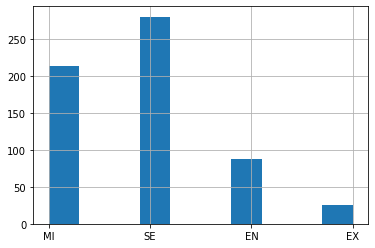

In [8]:
df.experience_level.hist()

la majorité des données représenté sont sénior et intermédiaire

<AxesSubplot:>

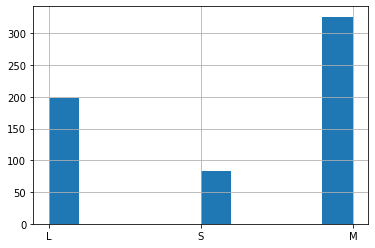

In [9]:
df.company_size.hist()

la majorité des données parviennent de moyennes ou grandes entreprises

In [10]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

experience_level       4
employment_type        4
job_title             50
salary_currency       17
employee_residence    57
company_location      50
company_size           3
dtype: int64

In [11]:
df.groupby(['job_title']).size().to_frame().sort_values([0], ascending=False).head().reset_index()

,job_title,0
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16


<AxesSubplot:>

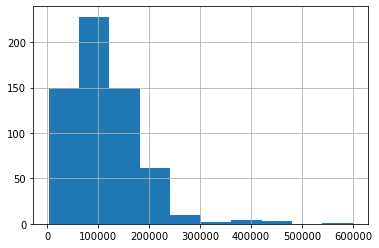

In [12]:
df.salary_in_usd.hist()

On observe une majoritée de salaire autour des 100k dollars à l'année avec très peu de salaires au dessus de 300k.

In [13]:
df_core = df.corr()
df_core
#matrice de corrélation de pearson

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.00,-0.09,0.17,0.08
salary,-0.09,1.00,-0.08,-0.01
salary_in_usd,0.17,-0.08,1.00,0.13
remote_ratio,0.08,-0.01,0.13,1.00


<AxesSubplot:>

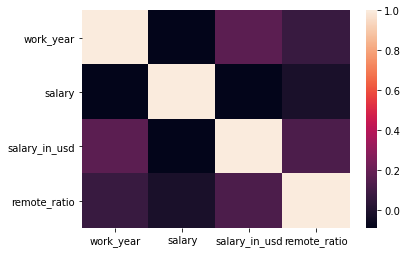

In [14]:
sns.heatmap(df_core)

On ne remarque pas de corrélation flagrante dans ce dataset

## Pre  processing

In [15]:
encoder = preprocessing.LabelEncoder()

In [16]:
df = df.drop(df[df.salary_in_usd > 300000].index)

<AxesSubplot:>

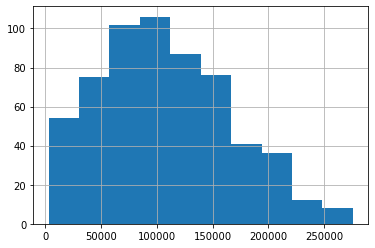

In [38]:
df.salary_in_usd.hist()

Une fois les salaires supérieure à 300k supprimé on se retrouve avec un dataset beaucoup plus équilibré ce qui améliorera les performances du modèle choisis

In [17]:
df["experience_level"] = encoder.fit_transform(df["experience_level"])
df["employment_type"] = encoder.fit_transform(df["employment_type"])
df["job_title"] = encoder.fit_transform(df["job_title"])
df["salary_currency"] = encoder.fit_transform(df["salary_currency"])
df["employee_residence"] = encoder.fit_transform(df["employee_residence"])
df["company_location"] = encoder.fit_transform(df["company_location"])
df["company_size"] = encoder.fit_transform(df["company_size"])

In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,21,70000,7,79833,14,0,12,0
1,2020,3,2,40,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,46,20000,16,20000,23,0,20,2
4,2020,3,2,37,150000,16,150000,55,50,48,0


### Séparation des données

In [19]:
X = np.array(df.loc[:, ~df.columns.isin(['salary', 'salary_in_usd'])])
X.shape

(597, 9)

In [20]:
y = np.array(df["salary_in_usd"])
y.shape

(597,)

### Standardisation

In [21]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

## Modèle

In [23]:
reg = LinearRegression().fit(X_train, y_train)

In [24]:
y_pred = reg.predict(X_test)

In [25]:
r2_score(y_test, y_pred)

0.38731606695640486

In [26]:
mean_absolute_error(y_test, y_pred)

35144.33776415932

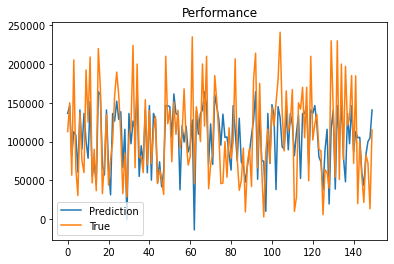

In [27]:
plt.title('Performance')
plt.plot(list(y_pred), label='Prediction')
plt.plot(list(y_test), label='True')
plt.legend()

## Recherche du meilleur modèle

In [28]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 24.34it/s]

                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
HistGradientBoostingRegressor                0.60       0.62   35760.36   
LGBMRegressor                                0.60       0.62   35866.66   
GradientBoostingRegressor                    0.59       0.62   35993.62   
XGBRegressor                                 0.57       0.60   37002.51   
ExtraTreesRegressor                          0.57       0.60   37024.45   
BaggingRegressor                             0.55       0.58   37764.05   
RandomForestRegressor                        0.55       0.58   37772.23   
AdaBoostRegressor                            0.47       0.50   41038.15   
DecisionTreeRegressor                        0.44       0.48   42193.72   
PoissonRegressor                             0.39       0.43   44117.91   
KNeighborsRegressor                          0.38       0.41   44618.99   
LassoLarsCV              

Malgrès son temps d'exécution supérieur le HistGradientBoostingRegressor présente des meilleurs performance par rapport aux autres modèles.

## HistGradientBoostingRegressor

Entrainement du modèle le plus performant d'après notre LazyRegressor afin de voir son MAE.

In [29]:
model = HistGradientBoostingRegressor().fit(X_train, y_train)

In [30]:
y_pred = model.predict(X_test)

In [31]:
mean_absolute_error(y_test, y_pred)

26912.91347375399

Maintenant que nous avons ce metric nous allons lancer un gridSearch afin de voi si l'on peut l'optimiser

In [32]:
model = HistGradientBoostingRegressor()
param = {'max_leaf_nodes': [8, 16, 32],
        'min_samples_leaf': [8, 16, 32]}
grid = GridSearchCV(model, param)
grid.fit(X_train, y_train)

GridSearchCV(estimator=HistGradientBoostingRegressor(),
             param_grid={'max_leaf_nodes': [8, 16, 32],
                         'min_samples_leaf': [8, 16, 32]})

In [33]:
grid.best_estimator_

HistGradientBoostingRegressor(max_leaf_nodes=8, min_samples_leaf=16)

In [34]:
reg = HistGradientBoostingRegressor(max_leaf_nodes=8, min_samples_leaf=16).fit(X_train, y_train)

In [35]:
y_pred = reg.predict(X_test)

In [36]:
mean_absolute_error(y_test, y_pred)

26321.50881493025

On peut voir une amélioration du modèle après gridSearch. Nous nous retrouvons avec une erreur moyenne absolue de 26300$ sur nos prédictions 

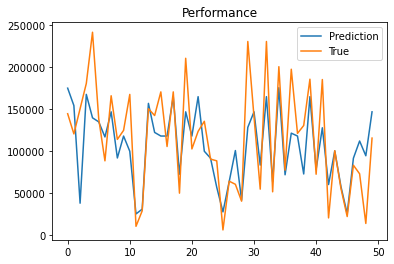

In [41]:
plt.title('Performance')
plt.plot(list(y_pred[100:]), label='Prediction')
plt.plot(list(y_test[100:]), label='True')
plt.legend()

Avec ce graph nous pouvons observer que le modèle à tendance à prédire un salaire plus bas que la réalité.